
# $$\textbf{Giant Pandas Could Soon Be Removed }\\\textbf{From The Endangered Species List}$$
$$\textrm{The International Union for the Conservation of Nature (IUCN) is assessing whether the giant panda can go from}\\\textrm{"endangered" to "vulnerable." The Chinese government reported in February 2015 that the giant panda populations}\\\textrm{in the wild have increased by 268 pandas — up 17 percent from a decade age. There are currently around 1,800}\\\textrm{giant pandas, which is an strong increase from the 1970's when there were only approximately only 1,000. The IUCN  }\\\textrm{says the population increase is due in part to scientific breeding methods in captivity. As a IUCN official indicated to }\\\textrm{the London Evening Standard, "Once a better understanding of biology and behaviour was incorporated into husbandry, }\\\textrm{captive pandas began to mate naturally and experienced exponential population growth."   The IUCN hasn't revealed a }\\\textrm{timetable for when the reclassification could be made, but for a species that's been on the endangered list for }\\\textrm{over 25 years, any improvement is a welcome change.}$$

<table align="center">
<tr><td>
<img src="pandas.png" width="600px" align="center"> 
</tr></td>
</table>


# Pandas are cute cuddly animals
* It is also the Flying Circus' answer to Excel and R Data Frames
* And they are built on top of NumPy NdArrays

# Objectives
* Create/Understand Series objects
    * Be aware of the Time Series class
* Create/Understand DataFrame objects
    * Understand the DataFrame Index
    * Create and destroy new columns
* Apply functions to rows and columns
    * Use DataFrame grouping and aggregation
    * Sort DataFrames
* Extend DataFrames
    * Concatenate/Append DataFrames
    * Merge/Join DataFrames
* Perform high-level EDA using Pandas


<br>

# Question: 
# When should one use Pandas?

<br>

<br>


<br>


<br>


<br>

<br>



## E.g., "When a team of animals is need to pull a sled across the expansive frozen tundra?"

<br>




# (Standard Library) Lists
* concatenate

In [90]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

# Numpy NdArrays
* operate elementwise

In [91]:
import numpy as np

In [92]:
np.array([1,2,3]) + np.array([4,5,6])

array([5, 7, 9])

# Numpy NdArrays

* have types

In [93]:
ints = np.array(range(3))
chars = np.array(list('ABC'))
strings = np.array(['A','BC',"DEF"])

print ints.dtype, chars.dtype, strings.dtype

int64 |S1 |S3


# Speed

https://ipython.org/ipython-doc/3/interactive/magics.html

In [64]:
numpy_array = np.arange(0, 1000000)
python_list = range(1000000)

time = %timeit -r 1 -o sum(python_list)
print time.all_runs[0]/time.loops

100 loops, best of 1: 8.38 ms per loop
0.00837615013123


In [47]:
time = %timeit -r 1 -o np.sum(numpy_array)
print time.all_runs[0]/time.loops

1000 loops, best of 1: 614 µs per loop
0.000613847017288


In [46]:
time = %timeit -r 1 -o sum(numpy_array)
print time.all_runs[0]/time.loops

10 loops, best of 1: 85.3 ms per loop
0.0853101968765


# Broadcasting

http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

In [56]:
a = np.array([[10],[-10]]) 
b = np.array([[1,2],[-1,-2]]) 
print a.shape, b.shape 
print ""
print a + b

(2, 1) (2, 2)

[[ 11  12]
 [-11 -12]]


In [55]:
a = np.array([[10, 0, -10],[-10, 0, -10]]) 
b = np.array([[1,2],[-1,-2]]) 
print a.shape, b.shape 
print ""
print a + b

(2, 3) (2, 2)



ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

In [54]:
#a = 10
#a = np.array(10)
#a = np.array([10])
b = np.array([[1,2],[-1,-2]]) 
print a + b
print ""
print a.shape, b.shape 

[[11 12]
 [ 9  8]]

() (2, 2)


# Pandas Series
* are np.ndarray (one dimensional) vectors with an index


In [73]:
import pandas as pd

In [74]:
series = pd.Series([5775,373,7,42,np.nan,33])
print series
print "\n"
print series.shape

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64


(6,)


In [75]:
world_series = pd.Series(["royals","giants","sox","giants","cards","giants","..."])
world_series

0    royals
1    giants
2       sox
3    giants
4     cards
5    giants
6       ...
dtype: object

# Pandas Date Types
* are fancy

In [76]:
bdays = pd.date_range(start='19821107', periods=33+1, freq=pd.DateOffset(years=1))
bdays

DatetimeIndex(['1982-11-07', '1983-11-07', '1984-11-07', '1985-11-07',
               '1986-11-07', '1987-11-07', '1988-11-07', '1989-11-07',
               '1990-11-07', '1991-11-07', '1992-11-07', '1993-11-07',
               '1994-11-07', '1995-11-07', '1996-11-07', '1997-11-07',
               '1998-11-07', '1999-11-07', '2000-11-07', '2001-11-07',
               '2002-11-07', '2003-11-07', '2004-11-07', '2005-11-07',
               '2006-11-07', '2007-11-07', '2008-11-07', '2009-11-07',
               '2010-11-07', '2011-11-07', '2012-11-07', '2013-11-07',
               '2014-11-07', '2015-11-07'],
              dtype='datetime64[ns]', freq='<DateOffset: kwds={'years': 1}>')

### Later -- after you learn Pandas -- you might care about using Date Types -- and the following could be useful:
* df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
* df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))



# Pandas DataFrames
* are a set of Pandas Series with the same index 
<br>

$(\text{NumPy Array} \subset \text{Pandas Series} \subset \text{Pandas DataFrame})$

In [272]:
mixedTypes_df = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","try"]),
                     'F' : 'foo' })

print mixedTypes_df
print ""
print mixedTypes_df.shape
print ""
mixedTypes_df.dtypes

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3    try  foo

(4, 6)



A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Additional Numpy NdArray
* stuff that will be useful

In [78]:
noise_ndarray = np.random.randn(34,6)
print noise_ndarray
print ""
print noise_ndarray.shape
print ""
print noise_ndarray.flatten() # copy
print ""
print noise_ndarray.flatten().shape
print ""
print noise_ndarray.ravel() # view
print ""
print noise_ndarray.ravel().shape

[[ 0.22345469 -0.31537229  2.03915066  1.45728498  0.12932998 -1.32421206]
 [ 1.14363998 -1.80017773  0.41320039 -0.3683858   0.77180925 -0.61396566]
 [-0.84758848  1.20402074  1.1912957   0.13880767 -0.43566887  1.84377713]
 [-0.04075912 -3.02531985  2.58464557  0.53260242 -1.16997193 -0.71421829]
 [ 0.46940739 -0.5183003  -1.7684893   0.93277763  0.40991429 -1.52549303]
 [ 1.11955686 -1.23721021 -0.21723057 -1.05501098  1.06042125  0.03758969]
 [ 0.0085282  -0.65968522 -0.22963955  0.13506355 -1.21518976 -0.76750785]
 [-0.0510432  -0.05062078 -0.10756096 -0.10436198 -0.23720216  0.25052205]
 [-1.16063312 -1.57576758 -0.01910362  0.80660533  1.93071311  0.51270877]
 [ 1.53017897  0.89661146  0.82529207  0.20325369  0.80039135 -0.73525405]
 [-2.16273292  0.09636543 -0.40056767 -0.00536771 -0.1808629   0.0504244 ]
 [-0.2296096   1.44860684 -0.10345321 -1.11156908  0.14324122  0.16595536]
 [ 0.14531327 -0.87248218  0.42928899  0.12503155  1.96293881  0.59871606]
 [ 0.5311081  -0.43123745

In [79]:
zeros_ndarray = np.zeros((3,4))        # Create a matrix of zeros with 3 rows and 4 columns. 
ones_ndarray = np.ones((10,20))        # Create a matrix of ones with 10 rows and 20 columns.
identity_ndarray = np.identity(50)     # Create an identity matrix with 50 rows and 50 columns. 
random_ndarray = np.random.rand(2, 2)  # Create a 2x2 array of random floats ranging from 0 to 1. 
range_ndarray = np.arange(0, 20, 0.5)  # Create a numpy array with arguments (start, end, step_size). 

In [94]:
print noise_ndarray.shape
print "\n" + "sum, axis=0"
print noise_ndarray.sum(axis=0)
print "\n" + "sum, axis=1"
print noise_ndarray.sum(axis=1)
print "\n" + "mean, axis=0"
print noise_ndarray.mean(axis=0)
print "\n" + "std, axis=0"
print noise_ndarray.std(axis=0)
print "\n" + "max, axis=0"
print noise_ndarray.max(axis=0)
print "\n" + "min, axis=0"
print noise_ndarray.min(axis=0)
print "\n" + "argmax, axis=0"
print noise_ndarray.argmax(axis=0)
print "\n" + "argmin, axis=0"
print noise_ndarray.argmin(axis=0)

(34, 6)

sum, axis=0
[  0.22422443  -6.93648887   0.82057069   6.14875025  12.20028361
   3.37376621]

sum, axis=1
[ 2.20963596 -0.45387958  3.0946439  -1.83302121 -2.00018333 -0.29188397
 -2.72843064 -0.30026703  0.49452289  3.52047349 -2.60274137  0.31317152
  2.3888065  -0.066133   -0.23461072  0.98798186 -1.3243595   0.71395398
  0.36774315  2.10280842 -2.25398337  3.23611178  3.11211775  1.30159661
  0.85425469 -0.78489849 -0.410592   -0.37887305  1.03875222  5.0744909
 -1.04243101 -1.26007593  2.49067226  0.49573266]

mean, axis=0
[ 0.00659484 -0.20401438  0.02413443  0.1808456   0.35883187  0.09922842]

std, axis=0
[ 0.79789934  1.10711821  1.03536674  0.81179642  0.9276112   0.91338778]

max, axis=0
[ 1.53017897  1.44860684  2.58464557  1.74414902  1.96293881  1.86650631]

min, axis=0
[-2.16273292 -3.02531985 -2.15782125 -1.32716606 -1.54737861 -1.74935809]

max, axis=0
[ 9 11  3 29 12 29]

min, axis=0
[10  3 20 27 23 16]


# Manipulating Pandas Indexes

In [126]:
noise_df = pd.DataFrame(noise_ndarray, index=bdays, columns=list('ABC123'))
noise_df
#noise_df.values
#noise_df.index
#noise_df.index.values
#noise_df.index.tolist()
#noise_df.columns

#noise_df.reset_index()
#noise_df.set_index("A")
#noise_df.reset_index().set_index("A")

# what is noise.df now?

#noise_df.rename(columns={'A': 'a'}, inplace=True)

,A,B,C,1,2,3
1982-11-07,NaN,-0.315372,2.039151,1.457285,0.129330,-1.324212
1983-11-07,1.143640,NaN,0.413200,-0.368386,0.771809,-0.613966
1984-11-07,-0.847588,1.204021,NaN,0.138808,-0.435669,1.843777
1985-11-07,-0.040759,-3.025320,2.584646,NaN,-1.169972,-0.714218
1986-11-07,0.469407,-0.518300,-1.768489,0.932778,NaN,-1.525493
1987-11-07,1.119557,-1.237210,-0.217231,-1.055011,1.060421,NaN
1988-11-07,0.008528,-0.659685,-0.229640,0.135064,-1.215190,-0.767508
1989-11-07,-0.051043,-0.050621,-0.107561,-0.104362,-0.237202,0.250522
1990-11-07,-1.160633,-1.575768,-0.019104,0.806605,1.930713,0.512709
1991-11-07,1.530179,0.896611,0.825292,0.203254,0.800391,-0.735254


In [89]:
noise_df.T

,1982-11-07 00:00:00,1983-11-07 00:00:00,1984-11-07 00:00:00,1985-11-07 00:00:00,1986-11-07 00:00:00,1987-11-07 00:00:00,1988-11-07 00:00:00,1989-11-07 00:00:00,1990-11-07 00:00:00,1991-11-07 00:00:00,...,2006-11-07 00:00:00,2007-11-07 00:00:00,2008-11-07 00:00:00,2009-11-07 00:00:00,2010-11-07 00:00:00,2011-11-07 00:00:00,2012-11-07 00:00:00,2013-11-07 00:00:00,2014-11-07 00:00:00,2015-11-07 00:00:00
A,0.223455,1.143640,-0.847588,-0.040759,0.469407,1.119557,0.008528,-0.051043,-1.160633,1.530179,...,0.261242,-0.179610,-0.080085,-1.562934,-0.696515,-0.564703,-0.192406,0.288575,0.012224,0.527937
B,-0.315372,-1.800178,1.204021,-3.025320,-0.518300,-1.237210,-0.659685,-0.050621,-1.575768,0.896611,...,0.915562,-1.189991,-1.185440,0.578027,-0.617338,0.435665,-1.040221,-1.975519,-0.243021,0.177839
C,2.039151,0.413200,1.191296,2.584646,-1.768489,-0.217231,-0.229640,-0.107561,-0.019104,0.825292,...,-0.308665,-1.518942,0.045684,-0.124105,1.688148,-0.103989,0.526933,-1.623684,0.044564,-1.221750
1,1.457285,-0.368386,0.138808,0.532602,0.932778,-1.055011,0.135064,-0.104362,0.806605,0.203254,...,0.416707,0.284589,0.349684,-1.327166,0.924072,1.744149,-0.728467,-0.092136,1.148207,1.244011
2,0.129330,0.771809,-0.435669,-1.169972,0.409914,1.060421,-1.215190,-0.237202,1.930713,0.800391,...,-0.306892,0.137632,0.435510,1.512476,0.286418,1.696863,0.133072,1.760563,0.622514,-1.173027
3,-1.324212,-0.613966,1.843777,-0.714218,-1.525493,0.037590,-0.767508,0.250522,0.512709,-0.735254,...,-0.123701,1.681423,0.024056,0.544830,-0.546033,1.866506,0.258659,0.382124,0.906184,0.940723


# Pandas Sorting

In [17]:
noise_df
#noise_df.sort_index(axis=1, ascending=False)
#noise_df.sort_index(axis=0, ascending=False)
#noise_df.sort_values(by='B')

,A,B,C,1,2,3
2001-11-07,-0.690861,-2.150499,0.381897,1.235038,0.168991,-0.401361
1993-11-07,-0.849520,-2.012598,0.308256,-1.163700,-1.358777,-1.570988
1997-11-07,0.688890,-1.931580,-0.328433,2.157514,0.504842,0.466205
2000-11-07,1.105567,-1.871766,0.394254,0.210375,0.360876,1.227413
2007-11-07,-0.032194,-1.821389,1.245147,-0.873282,0.380406,1.643398
2003-11-07,-0.075404,-1.600494,-2.356302,-1.349106,0.026852,0.147083
1992-11-07,1.164926,-1.586669,-0.028841,-0.981115,1.373132,0.634990
1985-11-07,0.142321,-1.532853,-0.154111,-1.720912,-0.901912,0.354806
1982-11-07,-0.408061,-1.506495,0.115660,-0.616186,-1.199773,2.723967
1984-11-07,1.096310,-1.485277,-1.547399,1.180848,1.607292,0.101271


# Accessing Data in Pandas
* is kind of special

In [24]:
print noise_nparray[:4,:4]
#is this a matrix?

print noise_df.head()
noise_df.columns
#noise_df[:4,:4]

# ANSWER THESE
#how to get rows?
#how to get columns?

# REMIND THESE
#.values
#.tolist()

[[-0.40806105 -1.50649488  0.11566029 -0.6161864 ]
 [-1.0063593   0.90842349 -0.27624063  1.55612646]
 [ 1.09630956 -1.48527659 -1.54739924  1.18084813]
 [ 0.14232142 -1.53285335 -0.15411129 -1.72091153]]
                   A         B         C         1         2         3
1982-11-07 -0.408061 -1.506495  0.115660 -0.616186 -1.199773  2.723967
1983-11-07 -1.006359  0.908423 -0.276241  1.556126  2.230980  0.098975
1984-11-07  1.096310 -1.485277 -1.547399  1.180848  1.607292  0.101271
1985-11-07  0.142321 -1.532853 -0.154111 -1.720912 -0.901912  0.354806
1986-11-07 -0.152001  0.769353  0.694325  1.567240  1.043435  0.465797


Index([u'A', u'B', u'C', u'1', u'2', u'3'], dtype='object')

In [122]:
watchOut_df = pd.DataFrame(np.random.randn(3,3), index=list('ABC'), columns=range(3))
print watchOut_df
print ""
print watchOut_df.columns
print ""

#watchOut_df[:1]
#watchOut_df[[0,1]]
#watchOut_df["1"]

          0         1         2
A  0.218783 -1.464819  1.156411
B  0.496705  0.203075 -0.574220
C -0.097067 -0.446709 -0.618646

Int64Index([0, 1, 2], dtype='int64') [0 1 2] [0, 1, 2]



array([0, 1, 2])

# The *.loc*

In [95]:
print noise_df[:3]
print ""
print bdays[:3]
print ""
print noise_df.columns, noise_df.columns.values, noise_df.columns.tolist()

noise_df.loc[bdays[0]]
#noise_df.loc[["B","C"]] # hint: ,

#noise_df.loc[:,[1,2]] # hint: "
#noise_df.loc[:3,["B","C"]]

#noise_df.loc[bdays[:3],["B","C"]]
#noise_df.loc[bdays[1]:bdays[3],["B","C"]]

                   A         B         C         1         2         3
1982-11-07  0.223455 -0.315372  2.039151  1.457285  0.129330 -1.324212
1983-11-07  1.143640 -1.800178  0.413200 -0.368386  0.771809 -0.613966
1984-11-07 -0.847588  1.204021  1.191296  0.138808 -0.435669  1.843777

DatetimeIndex(['1982-11-07', '1983-11-07', '1984-11-07'], dtype='datetime64[ns]', freq='<DateOffset: kwds={'years': 1}>')

Index([u'A', u'B', u'C', u'1', u'2', u'3'], dtype='object')


A    0.223455
B   -0.315372
C    2.039151
1    1.457285
2    0.129330
3   -1.324212
Name: 1982-11-07 00:00:00, dtype: float64

# The *.iloc*
* as opposed to the *.loc*

In [96]:
#print noise_df.iloc[bdays[0]:bdays[3],["B","C"]]
print noise_df.iloc[2:5,2:5]

                   C         1         2
1984-11-07  1.191296  0.138808 -0.435669
1985-11-07  2.584646  0.532602 -1.169972
1986-11-07 -1.768489  0.932778  0.409914


# The *.ix*
* as opposed(?) to the *.loc* and the *.iloc*

In [97]:
print noise_df.ix[:4,1:3]
print ""
print noise_df.ix[:bdays[3],1:3]
print ""
print noise_df.ix[:4,['B','C']]
print ""
print noise_df.ix[:bdays[3],['B','C']]
print ""

                   B         C
1982-11-07 -0.315372  2.039151
1983-11-07 -1.800178  0.413200
1984-11-07  1.204021  1.191296
1985-11-07 -3.025320  2.584646

                   B         C
1982-11-07 -0.315372  2.039151
1983-11-07 -1.800178  0.413200
1984-11-07  1.204021  1.191296
1985-11-07 -3.025320  2.584646

                   B         C
1982-11-07 -0.315372  2.039151
1983-11-07 -1.800178  0.413200
1984-11-07  1.204021  1.191296
1985-11-07 -3.025320  2.584646

                   B         C
1982-11-07 -0.315372  2.039151
1983-11-07 -1.800178  0.413200
1984-11-07  1.204021  1.191296
1985-11-07 -3.025320  2.584646



# The *.at/.iat*?

# Boolean Indexing

In [254]:
Schools_df = pd.read_csv("Schools.csv")
Players_df = pd.read_csv("SchoolsPlayers.csv")

Schools_df[(Schools_df.schoolState.isin(["TX"]) & Schools_df.schoolNick.str.contains("Tigers")) 
           | ((Schools_df.schoolCity.astype(str) == "Austin") & 
              ~(Schools_df["schoolName"].astype(str) == "University of Texas at Austin")) ] 

,schoolID,schoolName,schoolCity,schoolState,schoolNick
131,concrdiatx,Concordia University at Austin,Austin,TX,Tornados
180,etxbaptist,East Texas Baptist University,Marshall,TX,Tigers
565,stedwardtx,St. Edward's University,Austin,TX,Hilltoppers
618,trinitytx,Trinity University,San Antonio,TX,Tigers
628,txsouth,Texas Southern University,Houston,TX,Tigers


In [189]:
kp = (Schools_df.schoolState.isin(["TX"]) & Schools_df.schoolNick.str.contains("Tigers")) | \
    ((Schools_df.schoolCity.astype(str) == "Austin") & ~(Schools_df.schoolName.astype(str) == "University of Texas at Austin"))
print Schools_df.ix[kp, ["schoolName","schoolNick"]]
print ""
print Schools_df.loc[kp, "schoolName":"schoolNick"]
print ""
print Schools_df.iloc[kp ,1:2]

ValueError: expr must be a string to be evaluated, <class 'pandas.core.series.Series'> given

In [62]:
noise_nparray = np.random.randn(34,6)
noise_df = pd.DataFrame(noise_nparray, index=bdays, columns=list('ABC123'))
print noise_df[:3]
print ""
print noise_df[noise_df > 0]
print ""

                   A         B         C         1         2         3
1982-11-07 -1.234592  0.657422 -0.474902  0.577298 -0.103916  0.533183
1983-11-07 -1.038768 -0.306006 -0.470059  0.458310 -0.769214 -1.973304
1984-11-07 -0.840815  0.459439  0.044360  1.339315 -1.930242 -1.208807

                   A         B         C         1         2         3
1982-11-07       NaN  0.657422       NaN  0.577298       NaN  0.533183
1983-11-07       NaN       NaN       NaN  0.458310       NaN       NaN
1984-11-07       NaN  0.459439  0.044360  1.339315       NaN       NaN
1985-11-07       NaN       NaN       NaN  2.594043       NaN  0.811433
1986-11-07       NaN       NaN  0.264803       NaN       NaN  0.975840
1987-11-07       NaN  1.928900  0.850624  0.522374       NaN  0.369860
1988-11-07       NaN       NaN       NaN  0.885845  0.515287       NaN
1989-11-07  1.634142       NaN  0.405318       NaN       NaN       NaN
1990-11-07       NaN  0.445144  1.055741  0.776954       NaN       NaN
1991-

# *Copy* versus *View* 
* and not shooting yourself in the foot

In [63]:
abs_noise_df = noise_df
abs_noise_df[abs_noise_df < 0] = -abs_noise_df[abs_noise_df < 0] 

print "abs_noise_df[:3]"
print abs_noise_df[:3] 

print "\n"+"noise_df[:3]" 
print noise_df[:3] 
print "\n"+"noise_nparray[:3]" 
print noise_nparray[:3] 

# do you see a problem here?

abs_noise_df[:3]
                   A         B         C         1         2         3
1982-11-07  1.234592  0.657422  0.474902  0.577298  0.103916  0.533183
1983-11-07  1.038768  0.306006  0.470059  0.458310  0.769214  1.973304
1984-11-07  0.840815  0.459439  0.044360  1.339315  1.930242  1.208807

noise_df[:3]
                   A         B         C         1         2         3
1982-11-07  1.234592  0.657422  0.474902  0.577298  0.103916  0.533183
1983-11-07  1.038768  0.306006  0.470059  0.458310  0.769214  1.973304
1984-11-07  0.840815  0.459439  0.044360  1.339315  1.930242  1.208807

noise_nparray[:3]
[[ 1.23459237  0.65742172  0.47490237  0.5772976   0.10391574  0.5331831 ]
 [ 1.03876776  0.30600557  0.4700587   0.45830974  0.7692144   1.97330357]
 [ 0.8408147   0.45943899  0.04435971  1.33931511  1.93024241  1.20880729]]


In [64]:
noise_nparray = np.random.randn(34,6)
noise_df = pd.DataFrame(noise_nparray, index=bdays, columns=list('ABC123'))
abs_noise_df = noise_df.copy()

In [66]:
abs_noise_df[abs_noise_df < 0] = -abs_noise_df[abs_noise_df < 0] 

print "abs_noise_df[:3]"
print abs_noise_df[:3] 
print "\n"+"noise_df[:3]" 
print noise_df[:3] 
print "\n"+"noise_nparray[:3]" 
print noise_nparray[:3] 

# much better

abs_noise_df[:3]
                   A         B         C         1         2         3
1982-11-07  0.115238  0.609576  1.056442  0.481440  0.391459  0.662913
1983-11-07  0.368340  1.216877  1.081522  1.301743  0.493585  1.221645
1984-11-07  0.081397  0.414941  0.517444  0.927520  0.162035  0.332009

noise_df[:3]
                   A         B         C         1         2         3
1982-11-07 -0.115238  0.609576 -1.056442  0.481440 -0.391459 -0.662913
1983-11-07 -0.368340 -1.216877  1.081522  1.301743 -0.493585 -1.221645
1984-11-07  0.081397 -0.414941 -0.517444 -0.927520  0.162035 -0.332009

noise_nparray[:3]
[[-0.11523848  0.60957562 -1.05644248  0.4814397  -0.3914586  -0.66291289]
 [-0.36833964 -1.21687705  1.08152167  1.30174349 -0.49358456 -1.22164475]
 [ 0.08139658 -0.41494091 -0.51744421 -0.92752044  0.1620354  -0.33200946]]


# Adding Columns

In [99]:
mixedTypes_df = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","try"]),
                     'F' : 'foo' })

mixedTypes_augmented_df = mixedTypes_df.copy()

mixedTypes_augmented_df['F'] = mixedTypes_augmented_df['F'] + " fighter"
mixedTypes_augmented_df['G'] = 'hommies'

print "mixedTypes_df"
print mixedTypes_df
print "\n"+"mixedTypes_augmented_df"
print mixedTypes_augmented_df

mixedTypes_df
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3    try  foo

mixedTypes_augmented_df
     A          B    C  D      E            F        G
0  1.0 2013-01-02  1.0  3   test  foo fighter  hommies
1  1.0 2013-01-02  1.0  3  train  foo fighter  hommies
2  1.0 2013-01-02  1.0  3   test  foo fighter  hommies
3  1.0 2013-01-02  1.0  3    try  foo fighter  hommies


# Missing Values

In [100]:
mixedTypes_df[mixedTypes_df.E=="test"]=np.nan
print mixedTypes_df

     A          B    C    D      E    F
0  NaN        NaT  NaN  NaN    NaN  NaN
1  1.0 2013-01-02  1.0  3.0  train  foo
2  NaN        NaT  NaN  NaN    NaN  NaN
3  1.0 2013-01-02  1.0  3.0    try  foo


In [101]:
print mixedTypes_df
print ""
print mixedTypes_df.dropna(how='any') #df.dropna(subset=['a'])
print ""
print mixedTypes_df

     A          B    C    D      E    F
0  NaN        NaT  NaN  NaN    NaN  NaN
1  1.0 2013-01-02  1.0  3.0  train  foo
2  NaN        NaT  NaN  NaN    NaN  NaN
3  1.0 2013-01-02  1.0  3.0    try  foo

     A          B    C    D      E    F
1  1.0 2013-01-02  1.0  3.0  train  foo
3  1.0 2013-01-02  1.0  3.0    try  foo

     A          B    C    D      E    F
0  NaN        NaT  NaN  NaN    NaN  NaN
1  1.0 2013-01-02  1.0  3.0  train  foo
2  NaN        NaT  NaN  NaN    NaN  NaN
3  1.0 2013-01-02  1.0  3.0    try  foo


In [102]:
mixedTypes_df.F = mixedTypes_df['F'].fillna(value="I pity the")

print mixedTypes_df
print ""
print pd.isnull(mixedTypes_df)
print ""
print pd.notnull(mixedTypes_df)

     A          B    C    D      E           F
0  NaN        NaT  NaN  NaN    NaN  I pity the
1  1.0 2013-01-02  1.0  3.0  train         foo
2  NaN        NaT  NaN  NaN    NaN  I pity the
3  1.0 2013-01-02  1.0  3.0    try         foo

       A      B      C      D      E      F
0   True   True   True   True   True  False
1  False  False  False  False  False  False
2   True   True   True   True   True  False
3  False  False  False  False  False  False

       A      B      C      D      E     F
0  False  False  False  False  False  True
1   True   True   True   True   True  True
2  False  False  False  False  False  True
3   True   True   True   True   True  True


# Applying functions to Data
## A.k.a., transforming data, doing stuff to data, etc.
$(\text{NumPy Array} \subset \text{Pandas Series} \subset \text{Pandas DataFrame})$
* http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

In [181]:
for i in range(6):
    noise_df.iloc[i,i] = np.nan

print noise_df[:8]
print "\n" + "mean, axis=0"
print noise_df.mean(axis=0) 
print "\n" + "mean, axis=1"
print noise_df.mean(axis=1) 

                   A         B         C         1         2         3
1982-11-07       NaN -0.315372  2.039151  1.457285  0.129330 -1.324212
1983-11-07  1.143640       NaN  0.413200 -0.368386  0.771809 -0.613966
1984-11-07 -0.847588  1.204021       NaN  0.138808 -0.435669  1.843777
1985-11-07 -0.040759 -3.025320  2.584646       NaN -1.169972 -0.714218
1986-11-07  0.469407 -0.518300 -1.768489  0.932778       NaN -1.525493
1987-11-07  1.119557 -1.237210 -0.217231 -1.055011  1.060421       NaN
1988-11-07  0.008528 -0.659685 -0.229640  0.135064 -1.215190 -0.767508
1989-11-07 -0.051043 -0.050621 -0.107561 -0.104362 -0.237202  0.250522

mean, axis=0
A    0.000023
B   -0.155646
C   -0.011234
1    0.170186
2    0.357284
3    0.101096
dtype: float64

mean, axis=1
1982-11-07    0.397236
1983-11-07    0.269260
1984-11-07    0.380670
1985-11-07   -0.473125
1986-11-07   -0.482020
1987-11-07   -0.065895
1988-11-07   -0.454738
1989-11-07   -0.050045
1990-11-07    0.082420
1991-11-07    0.586746
1992

In [260]:
Schools_df.schoolState.value_counts()

PA    57
CA    48
NY    45
TX    41
OH    33
IL    30
NC    30
TN    29
FL    25
VA    25
GA    21
MI    20
IN    19
AL    18
MA    18
MO    16
IA    16
LA    15
SC    15
AR    15
WI    14
CT    13
KS    13
KY    13
WV    12
MD    12
NJ    12
OK    12
WA    11
MS    10
OR    10
MN    10
NE     8
UT     7
CO     7
RI     6
DC     6
ID     5
ME     5
NH     5
VT     4
AZ     4
NM     3
HI     3
DE     2
NV     2
MT     2
WY     1
SD     1
Name: schoolState, dtype: int64

In [191]:
Schools_df.schoolNick.unique()

array(['Wildcats', 'Panthers', 'Bulldogs', 'Falcons', 'Zips',
       'Crimson Tide', 'Hornets', 'Great Danes', 'Golden Rams', 'Coyotes',
       'Britons', 'Lions', 'Braves', 'Gators', 'Scots', 'Crusaders',
       'Eagles', 'Yellow Jackets', 'Lord Jeffs', 'Trojans', 'Mountaineers',
       'Saints', 'Sun Devils', 'Razorbacks', 'Golden Lions', 'Indians',
       'Boll Weevils', 'Wonder Boys', 'Pirates', 'Black Knights', 'Bears',
       'Tigers', 'Senators', 'Auggies', 'Kangaroos', 'Governors',
       'Cougars', 'Warriors', 'Cardinals', 'Bearcats', 'Bobcats', 'Bruins',
       'Buccaneers', 'Ravens', 'Bison', 'Royals', "Battlin' Beavers",
       'Huskies', 'Rams', 'Broncos', 'Terriers', 'Polar Bears', 'Judges',
       'Barons', 'Purple Knights', 'Bridges', 'Beavers', 'Bengals',
       'Golden Bears', 'Vulcans', 'Mustangs', 'Titans', 'Golden Eagles',
       'Matadors', 'Kingsmen', 'Aggies', 'Camels', 'Griffs', 'Redmen',
       'Spartans', 'Blue Devils', 'Knights', 'Gentlemen', 'Bronchos',
   

In [74]:
print noise_df.A[1:].quantile([0, .25, .5, .75, 1])
print ""
print pd.qcut(noise_df.A,[0, .25, .5, .75, 1])[:5]
print ""
print pd.cut(noise_df.A,3)[:5]

#discretization 

0.00   -1.800638
0.25   -0.373052
0.50   -0.095086
0.75    0.444872
1.00    2.307063
Name: A, dtype: float64

1982-11-07                  NaN
1983-11-07    (-0.373, -0.0951]
1984-11-07     (-0.0951, 0.445]
1985-11-07     [-1.801, -0.373]
1986-11-07       (0.445, 2.307]
Freq: <DateOffset: kwds={'years': 1}>, Name: A, dtype: category
Categories (4, object): [[-1.801, -0.373] < (-0.373, -0.0951] < (-0.0951, 0.445] < (0.445, 2.307]]

1982-11-07                 NaN
1983-11-07     (-0.431, 0.938]
1984-11-07     (-0.431, 0.938]
1985-11-07    (-1.805, -0.431]
1986-11-07     (-0.431, 0.938]
Freq: <DateOffset: kwds={'years': 1}>, Name: A, dtype: category
Categories (3, object): [(-1.805, -0.431] < (-0.431, 0.938] < (0.938, 2.307]]


In [75]:
print noise_df.apply(lambda x: x.max() - x.min())

A    4.107701
B    4.850430
C    3.263909
1    4.017524
2    4.948676
3    3.644492
dtype: float64


* [Extra Credict] Transform versus Apply -- what's the difference?

In [274]:
print noise_df[:3]
print ""
print noise_df.describe()
print ""
print mixedTypes_df
print ""
print mixedTypes_df.describe()

                   A         B         C         1         2         3
1982-11-07       NaN -0.315372  2.039151  1.457285  0.129330 -1.324212
1983-11-07  1.143640       NaN  0.413200 -0.368386  0.771809 -0.613966
1984-11-07 -0.847588  1.204021       NaN  0.138808 -0.435669  1.843777

               A          B          C          1          2          3
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000
mean    0.000023  -0.155646  -0.011234   0.170186   0.357284   0.101096
std     0.821535   1.104667   1.046481   0.834397   0.956116   0.941434
min    -2.162733  -3.025320  -2.157821  -1.327166  -1.547379  -1.749358
25%          NaN        NaN        NaN        NaN        NaN        NaN
50%          NaN        NaN        NaN        NaN        NaN        NaN
75%          NaN        NaN        NaN        NaN        NaN        NaN
max     1.530179   1.448607   2.584646   1.744149   1.962939   1.866506

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   

# Plotting
* for good, not evil

In [240]:
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
print plt.style.available 

import matplotlib
#matplotlib.style.use('ggplot')
matplotlib.style.use('classic')

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


                   A         B         C         1          2         3
1982-11-07       NaN -0.315372  2.039151  1.457285   0.129330 -1.324212
1983-11-07  1.143640       NaN  2.452351  1.088899   0.901139 -1.938178
1984-11-07  0.296052  0.888648       NaN  1.227707   0.465470 -0.094401
1985-11-07  0.255292 -2.136671  5.036997       NaN  -0.704502 -0.808619
1986-11-07  0.724700 -2.654972  3.268507  2.160484        NaN -2.334112
1987-11-07  1.844257 -3.892182  3.051277  1.105473   0.355920       NaN
1988-11-07  1.852785 -4.551867  2.821637  1.240537  -0.859270 -3.101620
1989-11-07  1.801742 -4.602488  2.714076  1.136175  -1.096472 -2.851098
1990-11-07  0.641109 -6.178255  2.694973  1.942780   0.834241 -2.338389
1991-11-07  2.171287 -5.281644  3.520265  2.146034   1.634632 -3.073643
1992-11-07  0.008555 -5.185279  3.119697  2.140666   1.453769 -3.023219
1993-11-07 -0.221055 -3.736672  3.016244  1.029097   1.597011 -2.857263
1994-11-07 -0.075742 -4.609154  3.445533  1.154129   3.559949 -2

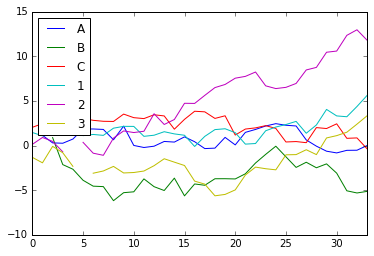

In [241]:
random_walk_df = noise_df.apply(np.cumsum)
print random_walk_df
random_walk_df = random_walk_df.reset_index()
print ""
print random_walk_df.columns
print ""
print random_walk_df
del random_walk_df['index'] # or df.drop('index', inplace=True, axis=1)
print ""
print random_walk_df.columns

random_walk_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13eb0ce50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13f0263d0>]], dtype=object)

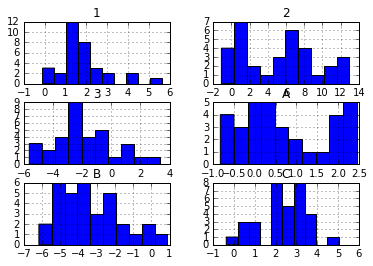

In [242]:
plt.figure()
random_walk_df.hist()
#plt.tight_layout()

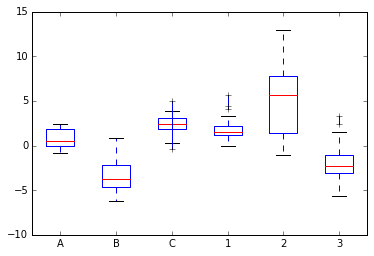

In [243]:
random_walk_df.plot(kind='box')

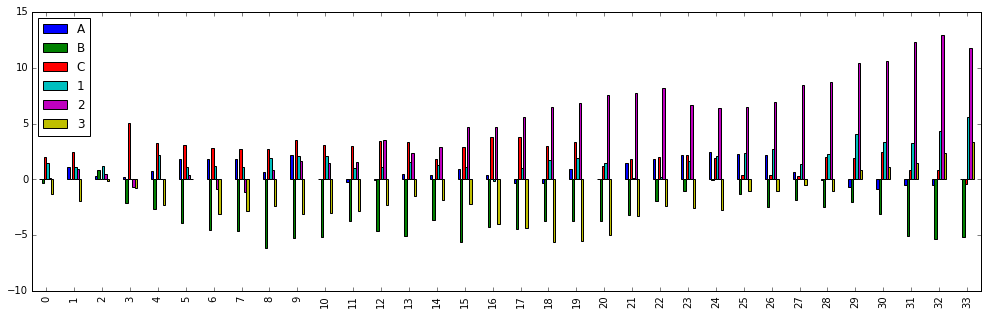

In [244]:
import pylab
pylab.rcParams['figure.figsize']=(17,5)
random_walk_df.plot(kind='bar')
pylab.rcParams['figure.figsize']=(7,5)

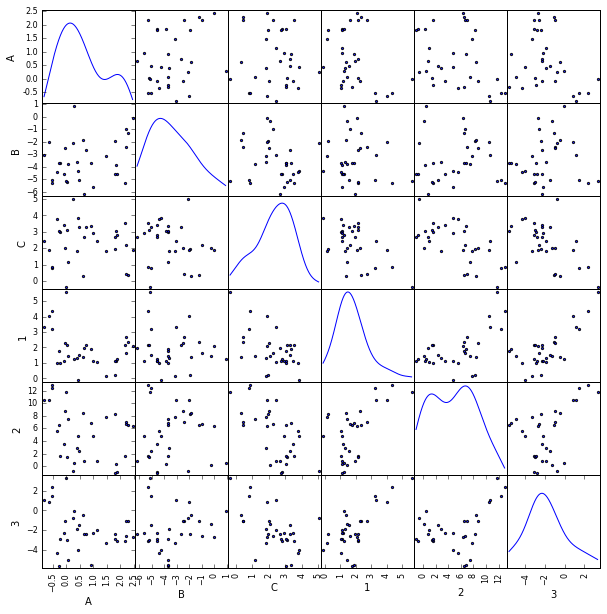

In [245]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(random_walk_df, alpha=0.9, figsize=(10, 10), diagonal='kde')
pylab.rcParams['figure.figsize']=(7,5)

* http://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org/users/style_sheets.html
* http://matplotlib.org
* https://stanford.edu/~mwaskom/software/seaborn/ 
* http://bokeh.pydata.org/en/latest/


# Elementwise Operations
* with broadcasting

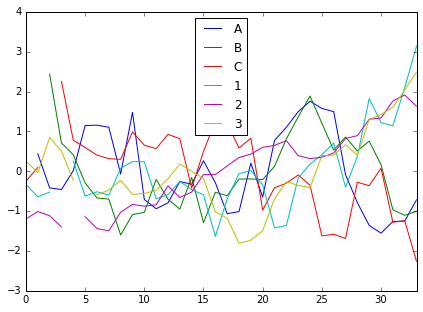

In [246]:
pylab.rcParams['figure.figsize']=(7,5)
standarized_walk_df = (random_walk_df - random_walk_df.mean()) / random_walk_df.std()

plt.figure()
standarized_walk_df.plot()

In [109]:
tmp = noise_df[["1","2","3"]] #.copy()?
#tmp.iloc[1,1] = 1.0
#noise_df.iloc[1,1]

print noise_df[:6]
print ""
print tmp[:6]

#tmp.columns = list('ABC')
noise_df[["A","B","C"]] + tmp

                   A         B         C         1         2         3
1982-11-07       NaN -0.315372  2.039151  1.457285  0.129330 -1.324212
1983-11-07  1.143640       NaN  0.413200 -0.368386  0.771809 -0.613966
1984-11-07 -0.847588  1.204021       NaN  0.138808 -0.435669  1.843777
1985-11-07 -0.040759 -3.025320  2.584646       NaN -1.169972 -0.714218
1986-11-07  0.469407 -0.518300 -1.768489  0.932778       NaN -1.525493
1987-11-07  1.119557 -1.237210 -0.217231 -1.055011  1.060421       NaN

                   1         2         3
1982-11-07  1.457285  0.129330 -1.324212
1983-11-07 -0.368386  0.771809 -0.613966
1984-11-07  0.138808 -0.435669  1.843777
1985-11-07       NaN -1.169972 -0.714218
1986-11-07  0.932778       NaN -1.525493
1987-11-07 -1.055011  1.060421       NaN


,1,2,3,A,B,C
1982-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1983-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1984-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1985-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1986-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1987-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1988-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1989-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1990-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1991-11-07,NaN,NaN,NaN,NaN,NaN,NaN


# Concatenating
* adding *rows*
* see also: df.append()
* http://pandas.pydata.org/pandas-docs/stable/merging.html

In [253]:
print noise_df[:3]
print ""
print noise_df[30:]
print ""
print pd.concat([noise_df[:3],noise_df[30:]])

                   A         B         C         1         2         3
1982-11-07       NaN -0.315372  2.039151  1.457285  0.129330 -1.324212
1983-11-07  1.143640       NaN  0.413200 -0.368386  0.771809 -0.613966
1984-11-07 -0.847588  1.204021       NaN  0.138808 -0.435669  1.843777

                   A         B         C         1         2         3
2012-11-07 -0.192406 -1.040221  0.526933 -0.728467  0.133072  0.258659
2013-11-07  0.288575 -1.975519 -1.623684 -0.092136  1.760563  0.382124
2014-11-07  0.012224 -0.243021  0.044564  1.148207  0.622514  0.906184
2015-11-07  0.527937  0.177839 -1.221750  1.244011 -1.173027  0.940723

                   A         B         C         1         2         3
1982-11-07       NaN -0.315372  2.039151  1.457285  0.129330 -1.324212
1983-11-07  1.143640       NaN  0.413200 -0.368386  0.771809 -0.613966
1984-11-07 -0.847588  1.204021       NaN  0.138808 -0.435669  1.843777
2012-11-07 -0.192406 -1.040221  0.526933 -0.728467  0.133072  0.258659
2013

In [99]:
pd.concat([noise_df[["1","2","3"]],noise_df[["A","B","C"]]])

,1,2,3,A,B,C
1982-11-07,0.481440,-0.391459,-0.662913,NaN,NaN,NaN
1983-11-07,1.301743,-0.493585,-1.221645,NaN,NaN,NaN
1984-11-07,-0.927520,0.162035,-0.332009,NaN,NaN,NaN
1985-11-07,NaN,-0.458858,1.552695,NaN,NaN,NaN
1986-11-07,-0.164963,NaN,-1.573577,NaN,NaN,NaN
1987-11-07,1.097457,0.209988,NaN,NaN,NaN,NaN
1988-11-07,-0.732218,1.295821,1.109678,NaN,NaN,NaN
1989-11-07,-0.410553,-1.076539,0.546845,NaN,NaN,NaN
1990-11-07,-0.678611,0.208063,2.070915,NaN,NaN,NaN
1991-11-07,-0.194351,0.280831,0.538520,NaN,NaN,NaN


In [503]:
A = noise_df[["1","2","3"]]
A = A.reset_index()
del A['index']
A.columns = list('ABC')
B = noise_df[["A","B","C"]]
B = B.reset_index()
del B['index']

C = pd.concat([A,B])
print C
print ""
print C.loc[1,:] # what's going on here with multiple results?
print ""
C = pd.concat([A,B],ignore_index=True)
print C
print ""
print C.loc[1,:] # did that fix it?

           A         B         C
0  -0.797950  0.239466 -1.099166
1   0.272327  0.642313  0.055487
2   0.831804  0.072169 -0.290819
3        NaN  1.156665 -0.148857
4  -0.454424       NaN  1.243323
5  -1.468382  0.816817       NaN
6   1.825003  0.155268 -0.263866
7  -0.435368  0.269240  0.278288
8   0.346958  0.707913  0.544079
9  -0.869219  0.471250  1.903812
10  0.365176 -0.994120 -1.740444
11 -1.396149  0.134390 -0.234765
12 -2.174942  0.156501  0.723313
13 -0.407886 -0.745333 -1.673190
14  1.405216 -0.260022 -0.594289
15 -1.123894  0.510519  0.632623
16 -0.504299 -0.238170  0.562352
17  2.424360  2.153567 -0.929486
18  1.786132 -0.328896  0.062929
19 -1.193611  1.361895  0.205944
20 -1.439005 -0.226523 -1.718868
21  0.383681  0.508248  0.292016
22 -0.249947 -2.255220 -0.204248
23 -0.110319  0.830679 -0.592587
24  0.602229 -0.082059 -0.237489
25  0.754064  0.538607  0.942944
26  0.687577 -1.809002  0.539454
27 -0.452898 -0.041137  0.144398
28 -1.041811  0.253253 -0.059690
29 -0.5077

# Merging
* adding *columns*
* see also: df.join
* http://pandas.pydata.org/pandas-docs/stable/merging.html

In [256]:
schools_df = pd.read_csv('Schools.csv')
print schools_df[:3] 
print schools_df.shape
players_df = pd.read_csv('SchoolsPlayers.csv')
print ""
print players_df[:3]
print players_df.shape

pd.merge(schools_df, players_df, on='schoolID')

     schoolID                    schoolName   schoolCity schoolState  \
0  abilchrist  Abilene Christian University      Abilene          TX   
1     adelphi            Adelphi University  Garden City          NY   
2    adrianmi                Adrian College       Adrian          MI   

  schoolNick  
0   Wildcats  
1   Panthers  
2   Bulldogs  
(749, 5)

    playerID schoolID  yearMin  yearMax
0  aardsda01   pennst     2001     2001
1  aardsda01     rice     2002     2003
2  abbeybe01  vermont     1888     1892
(6147, 4)


,schoolID,schoolName,schoolCity,schoolState,schoolNick,playerID,yearMin,yearMax
0,abilchrist,Abilene Christian University,Abilene,TX,Wildcats,gilbrbi01,1966,1969
1,adelphi,Adelphi University,Garden City,NY,Panthers,sambijo01,1971,1973
2,adrianmi,Adrian College,Adrian,MI,Bulldogs,kisinru01,1895,1902
3,adrianmi,Adrian College,Adrian,MI,Bulldogs,roggecl01,1910,1914
4,akron,University of Akron,Akron,OH,Zips,birkbmi01,1980,1983
5,akron,University of Akron,Akron,OH,Zips,dilauja01,1962,1962
6,akron,University of Akron,Akron,OH,Zips,malasma01,1997,2000
7,alabama,University of Alabama,Tuscaloosa,AL,Crimson Tide,avilaal01,2006,2008
8,alabama,University of Alabama,Tuscaloosa,AL,Crimson Tide,barnere01,1925,1926
9,alabama,University of Alabama,Tuscaloosa,AL,Crimson Tide,baumgjo01,1950,1952


# SQL Style Joining
* Left, right, inner, outer...

In [113]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo', 'foo','post'], 'rval': ["A", "B", "C"]})

print "X"
print left
print "Y"
print right
print "\n" + "X outer join Y"
print pd.merge(left, right, on='key', how='outer')
print "\n" + "X inner join Y"
print pd.merge(left, right, on='key', how='inner')
print "\n" + "X left join Y"
print pd.merge(left, right, on='key', how='left')
print "\n" + "X right join Y"
print pd.merge(left, right, on='key', how='right')

X
   key  lval
0  foo     1
1  foo     2
2  bar     3
Y
    key rval
0   foo    A
1   foo    B
2  post    C

X outer join Y
    key  lval rval
0   foo   1.0    A
1   foo   1.0    B
2   foo   2.0    A
3   foo   2.0    B
4   bar   3.0  NaN
5  post   NaN    C

X inner join Y
   key  lval rval
0  foo     1    A
1  foo     1    B
2  foo     2    A
3  foo     2    B

X left join Y
   key  lval rval
0  foo     1    A
1  foo     1    B
2  foo     2    A
3  foo     2    B
4  bar     3  NaN

X right join Y
    key  lval rval
0   foo   1.0    A
1   foo   2.0    A
2   foo   1.0    B
3   foo   2.0    B
4  post   NaN    C


# Group By
* Aggregate, Apply
* http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [264]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

print df
print ""
df.groupby('A').size()

     A      B         C         D
0  foo    one  1.155264  1.103046
1  bar    one -0.839162  2.030529
2  foo    two -0.061071 -0.248698
3  bar  three  0.610963 -0.297092
4  foo    two -0.381271  0.381775
5  bar    two  0.230430  0.189908
6  foo    one  0.908785  0.435395
7  foo  three -0.530100 -0.079843



A
bar    3
foo    5
dtype: int64

In [266]:
print df.groupby(['A','B']).sum()
print ""
print df.groupby('A').sum()

                  C         D
A   B                        
bar one   -0.839162  2.030529
    three  0.610963 -0.297092
    two    0.230430  0.189908
foo one    2.064049  1.538441
    three -0.530100 -0.079843
    two   -0.442342  0.133077

            C         D
A                      
bar  0.002230  1.923344
foo  1.091608  1.591675


# Remember, Sorting is just done as a sort -- *not* a Group By
* You just sort by mulptiple columns

In [112]:
print df.sort_values(by = ['A','C'])

     A      B         C         D
3  bar  three -0.035159  0.226926
1  bar    one  0.103004  1.080428
5  bar    two  1.160189  1.600172
0  foo    one -0.531358 -1.416213
2  foo    two -0.296579  0.583154
7  foo  three -0.129596  0.957979
4  foo    two  0.140600 -0.329946
6  foo    one  0.513823 -0.179626


# Multi-Indexing
* group by structuring

In [113]:
index = pd.MultiIndex.from_tuples(names=['first', 'second'],
            tuples = list(zip(['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                              ['one', 'two', 'one', 'two','one', 'two', 'one', 'two'])))

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

A         B         C
first second                              
bar   one    -0.513896 -0.961977  0.750159
      two    -0.608206 -0.089198 -0.400221
baz   one    -2.487972  0.855418  1.455794
      two    -0.918469 -1.378231  1.354984
foo   one    -1.227597  0.652019 -0.489336
      two    -0.002773 -0.981182  2.491090
qux   one    -0.871317 -0.305124  1.170457
      two     1.145288 -0.417713 -0.463098

# Stacking
* and unstacking

In [114]:
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.513896
               B   -0.961977
               C    0.750159
       two     A   -0.608206
               B   -0.089198
               C   -0.400221
baz    one     A   -2.487972
               B    0.855418
               C    1.455794
       two     A   -0.918469
               B   -1.378231
               C    1.354984
foo    one     A   -1.227597
               B    0.652019
               C   -0.489336
       two     A   -0.002773
               B   -0.981182
               C    2.491090
qux    one     A   -0.871317
               B   -0.305124
               C    1.170457
       two     A    1.145288
               B   -0.417713
               C   -0.463098
dtype: float64

In [117]:
stacked.unstack() #.unstack() 

A         B         C
first second                              
bar   one    -0.513896 -0.961977  0.750159
      two    -0.608206 -0.089198 -0.400221
baz   one    -2.487972  0.855418  1.455794
      two    -0.918469 -1.378231  1.354984
foo   one    -1.227597  0.652019 -0.489336
      two    -0.002773 -0.981182  2.491090
qux   one    -0.871317 -0.305124  1.170457
      two     1.145288 -0.417713 -0.463098

In [119]:
print stacked
stacked.unstack(0)

first  second   
bar    one     A   -0.513896
               B   -0.961977
               C    0.750159
       two     A   -0.608206
               B   -0.089198
               C   -0.400221
baz    one     A   -2.487972
               B    0.855418
               C    1.455794
       two     A   -0.918469
               B   -1.378231
               C    1.354984
foo    one     A   -1.227597
               B    0.652019
               C   -0.489336
       two     A   -0.002773
               B   -0.981182
               C    2.491090
qux    one     A   -0.871317
               B   -0.305124
               C    1.170457
       two     A    1.145288
               B   -0.417713
               C   -0.463098
dtype: float64


first          bar       baz       foo       qux
second                                          
one    A -0.513896 -2.487972 -1.227597 -0.871317
       B -0.961977  0.855418  0.652019 -0.305124
       C  0.750159  1.455794 -0.489336  1.170457
two    A -0.608206 -0.918469 -0.002773  1.145288
       B -0.089198 -1.378231 -0.981182 -0.417713
       C -0.400221  1.354984  2.491090 -0.463098

# Even .xlsx is supported
* http://pandas.pydata.org/pandas-docs/stable/io.html


# So is SQL
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html

# So is Pickle



<br>

# *Of course we can write out in all of these formats, just like we can read in*

<br>

<br>





In [269]:
jes = pd.read_excel("/Users/schwarls37/Documents/Robert Distribution Environmental Data 2016.08.04.xlsx",
                    skiprows=1).iloc[:38,:]

jes.rename(columns = {'Evaluation Criteria':'Category', 'Unnamed: 1':'Evaluation Criteria'}, inplace = True)
jes['Route 2'] = pd.to_numeric(jes['Route 2'])
jes['Route 6'] = pd.to_numeric(jes['Route 6'])

jes

,Category,Evaluation Criteria,Priority,Route 1,Route 2,Route 3,Route 4,Route 5,Route 6,Route 7,Route 8,Route 9,Route 10,Route 11,Route 12,Route 13,Route 14,Route 15
0,Land Use,Length of alternative route,A,12.393319,12.532375,11.982177,12.186081,12.284948,11.905479,12.094633,11.955761,11.995765,12.338979,11.927838,11.854583,11.982839,11.851827,11.883971
1,Land Use,Number of habitable structures1 within 300 fee...,A,74.000000,60.000000,76.000000,85.000000,77.000000,87.000000,65.000000,63.000000,73.000000,86.000000,88.000000,69.000000,61.000000,65.000000,69.000000
2,Land Use,Length of route utilizing existing transmissio...,A,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444
3,Land Use,Length of route parallel to existing transmiss...,B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Land Use,Length of route parallel to other existing ROW...,B,9.014039,8.928521,7.826558,8.814067,7.149957,8.538980,5.304174,8.157521,6.968284,9.414494,8.227014,7.868760,4.650197,7.829883,6.314307
5,Land Use,Length of route parallel to apparent property ...,B,0.561264,0.569032,0.838428,0.542529,2.339473,0.537015,2.080869,1.071685,0.283924,0.277339,0.554503,1.450945,2.287281,1.465778,0.490337
6,Land Use,Length of route through parks/recreational areas3,B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Land Use,Number of additional parks/recreational areas3...,B,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,Land Use,Length of route through cropland,B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Land Use,Length of route through pasture/rangeland or o...,C,1.270120,0.822551,1.146895,1.270120,1.270120,1.146895,1.116145,0.693215,1.116145,0.937444,0.814219,0.710777,0.771413,0.049021,0.771413


# Pivot Tables
* http://pandas.pydata.org/pandas-docs/version/0.15.2/reshaping.html

In [124]:
pd.pivot_table(jes, index = ['Category', 'Priority'],
               aggfunc = [len, max], values = ['Route 1', 'Route 7'])

len                max           
                            Route 1 Route 7    Route 1    Route 7
Category           Priority                                      
Aesthetics         A            1.0     1.0   9.267968   4.558907
                   B            1.0     1.0   0.163165   0.163165
Cultural Resources A            2.0     2.0   0.000000   0.000000
                   B            1.0     1.0   0.000000   0.000000
                   C            2.0     2.0   6.914682   6.226903
Ecology            A            2.0     2.0   0.559585   2.361104
                   B            2.0     2.0   7.699197   6.117214
                   C            5.0     5.0  14.000000  13.000000
Land Use           A            3.0     3.0  74.000000  65.000000
                   B            6.0     6.0   9.014039   5.304174
                   C           13.0    13.0   9.000000   6.000000

In [279]:
m_pd = pd.merge(schools_df, players_df, on='schoolID')
pd.crosstab(m_pd.schoolState, m_pd.schoolNick)

schoolNick,49ers,Aggies,Anchormen,Anteaters,Antelopes,Argonauts,Auggies,Aztecs,Badgers,Bald Eagles,...,Waves,Wildcats,Wolfpack,Wolverines,Wolves,Wonder Boys,Yellow Jackets,Yellowjackets,Yeoman,Zips
schoolState,,,,,,,,,,,,,,,,,,,,,
AL,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
AZ,0,0,0,0,13,0,0,0,0,0,...,0,66,0,0,0,0,0,0,0,0
CA,33,1,0,5,0,0,0,37,0,0,...,30,2,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FL,0,0,0,0,0,2,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


# Some Other Intro To Pandas Notebooks
* https://github.com/zipfian/DSI_Lectures/blob/master/pandas/sallamander/numpy_notes.ipynb
* https://github.com/zipfian/DSI_Lectures/blob/master/pandas/numpy_pandas.ipynb  
* http://pandas.pydata.org/pandas-docs/stable/10min.html

# And the Official Documentation
* http://pandas.pydata.org/pandas-docs/stable/index.html

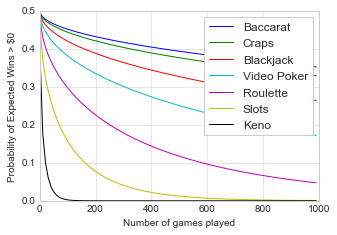

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import pylab
#[u'seaborn-darkgrid', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']
matplotlib.style.use('seaborn-whitegrid')
%matplotlib inline
pylab.rcParams['figure.figsize']=(5,3.4)

games_played = np.arange(1,1000,10)
fig = plt.figure(1)
p = .506; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/games_played)),label="Baccarat")
p = .507; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/games_played)),label="Craps")
p = .51; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/games_played)),label="Blackjack")
p = .515; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/games_played)),label="Video Poker")
p = .5265; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/games_played)),label="Roulette")
p = .55; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/games_played)),label="Slots")
p = .635; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/games_played)),label="Keno")
plt.xlabel("Number of games played")
plt.ylabel("Probability of Expected Wins > $0")
plt.legend(frameon = 1)